# Bibliotecas

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Carregando Dados

In [16]:
train = pd.read_csv("train_.csv")
test = pd.read_csv("test_.csv", index_col = "PassengerId")

# Dados para Teste

In [17]:
X = train.drop(columns='Survived')
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Redução da Dimensionalidade

In [4]:
pca = PCA()
x_pca = pca.fit(X).transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.658006,-0.356001,0.932271,-0.605956,0.607121,0.006229,-0.156715,0.194580,0.007161
1,4.431294,0.073414,0.327184,-0.308570,-0.763854,0.190310,-0.488516,-0.303519,0.106193
2,-1.321492,-0.344413,-0.013678,0.349542,-0.104447,-1.032334,-0.096123,-0.488583,-0.146149
3,4.428134,0.129075,0.050717,-0.615282,-0.010856,-0.312409,-0.531103,-0.368648,0.081750
4,-1.349829,-0.604694,-0.169041,-0.261738,0.361846,0.038905,0.261775,-0.329395,-0.022713


[0.56365914 0.20119242 0.06777248 0.05330522 0.04526092 0.0312647
 0.01747836 0.01648747 0.00357929]


<AxesSubplot:>

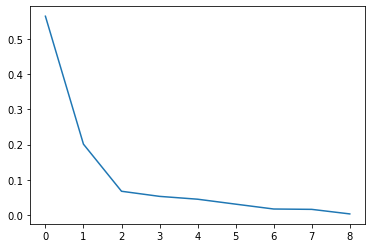

In [5]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
sns.lineplot(data = explained_variance)

- Podemos notar que as 3 primeiras variáveis podem explicar aproximadamente 82% dos dados

In [6]:
pca = PCA(n_components=4)
x_pca = pca.fit(X).transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4']
x_pca.head()

,PC1,PC2,PC3,PC4
0,-1.658006,-0.356001,0.932271,-0.605956
1,4.431294,0.073414,0.327184,-0.308570
2,-1.321492,-0.344413,-0.013678,0.349542
3,4.428134,0.129075,0.050717,-0.615282
4,-1.349829,-0.604694,-0.169041,-0.261738


# Escolhendo o melhor modelo

## AdaBoost

In [11]:
model = AdaBoostClassifier()


grid = dict()
grid['n_estimators'] = [30, 40, 50]
grid['learning_rate'] = [0.1, 0.3, 0.5]
grid['base_estimator'] = [None, RandomForestClassifier(max_depth=3)]


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', verbose = 2)
grid_result = grid_search.fit(X, y)

print("Melhor: %f Usando %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 15 folds for each of 18 candidates, totalling 270 fits
Melhor: 0.826412 Usando {'base_estimator': RandomForestClassifier(max_depth=3), 'learning_rate': 0.3, 'n_estimators': 50}


## SVM

In [7]:
model = svm.SVC()


grid = dict()
grid['kernel'] = ['rbf']
grid['gamma'] = [1, 0.1, 0.01]
grid['C'] = [1, 100, 250]


cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', verbose = 3)
grid_result = grid_search.fit(X, y)

print("Melhor: %f Usando %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 9 folds for each of 9 candidates, totalling 81 fits
Melhor: 0.826038 Usando {'C': 250, 'gamma': 0.01, 'kernel': 'rbf'}


# Criando o modelo

In [18]:
classifier = AdaBoostClassifier(
    algorithm='SAMME.R',
    base_estimator=RandomForestClassifier(max_depth=3),
    learning_rate=0.3,
    n_estimators=50,
    random_state=None
)

# Treinando
classifier.fit(X,y)

# Prevendo
pred = classifier.predict(test)

- Gerando o arquivo .csv para a submissão no Kaggle. 

In [19]:
saida = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": pred
    })

saida.to_csv('titanic_submission.csv', index=False)
resultado = pd.read_csv('titanic_submission.csv')

- Verificando o DataFrame de Saída

In [20]:
resultado

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
